In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn

In [2]:
df = pd.read_csv("Advertising.csv", index_col=0)

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [21]:
X_train = df.values[:, 1]
y_train = df.values[:, -1]

In [23]:
len(X_train)

200

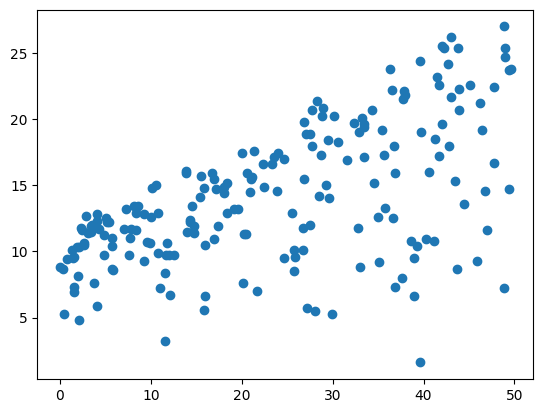

In [24]:
plt.scatter(X, y);

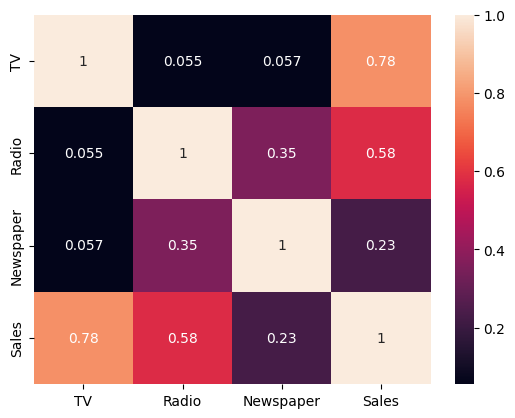

In [14]:
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

# Model Deployment

In [30]:
def predict(X_predict, weight, bias):
    y_predict = X_predict*weight + bias
    return y_predict

def cost_function(X_train, y_train, weight, bias):
    sum_error = 0 
    for i in range(len(X_train)):
        sum_error += (y_train[i] - (weight*X_train[i] + bias))**2
    return sum_error/len(X_train)

def fit(X_train, y_train, weight, bias, learning_rate = 0.001):
    weight = 0
    bias = 0 
    for i in range(len(X_train)):
        dw =  -2*X_train*(y_train[i] - (weight*X_train[i] + bias))
        db = -2*(y_train[i] - (weight*X_train[i] + bias))
    weight -= learning_rate * (dw/len(X_train))
    bias -= learning_rate *( db/len(X_train))
    return weight, bias

def train(X_train, y_train, weight, bias, learning_rate, iter):
    cost_his = []
    for i in range(iter):
        weight, bias = fit(X_train, y_train, weight, bias, learning_rate)
        cost = cost_function(X_train, y_train, weight, bias)
        cost_his.append(cost)
    return weight, bias

In [32]:
weight, bias = train(X_train, y_train, 0, 0, learning_rate= 0.001, iter= 100)
print(weight)
print(bias)

[5.0652e-03 5.2662e-03 6.1506e-03 5.5342e-03 1.4472e-03 6.5526e-03
 4.3952e-03 2.6264e-03 2.8140e-04 3.4840e-04 7.7720e-04 3.2160e-03
 4.7034e-03 1.0184e-03 4.4086e-03 6.3918e-03 4.9044e-03 5.3064e-03
 2.7470e-03 3.2026e-03 3.7118e-03 6.8340e-04 2.1306e-03 2.2646e-03
 1.6884e-03 4.6900e-04 3.9262e-03 2.2378e-03 3.6314e-03 2.1440e-03
 3.7922e-03 2.3316e-03 2.0100e-04 2.6800e-03 1.8760e-04 5.4940e-04
 5.8692e-03 6.6196e-03 3.5778e-03 5.0518e-03 2.9882e-03 4.4756e-03
 3.7118e-03 1.1256e-03 3.4438e-03 3.0150e-03 1.3266e-03 5.5610e-03
 2.1172e-03 1.5678e-03 4.1540e-04 1.2864e-03 5.5878e-03 6.1908e-03
 3.8592e-03 6.6196e-03 3.7654e-03 2.5728e-03 6.6464e-03 3.9530e-03
 2.6800e-04 5.7218e-03 2.0770e-03 3.9664e-03 5.7352e-03 1.2462e-03
 3.2964e-03 1.9430e-03 3.6850e-03 5.8826e-03 4.1004e-03 1.9162e-03
 4.4220e-03 7.6380e-04 3.2964e-03 5.8558e-03 2.1440e-04 3.8190e-03
 4.0066e-03 1.0318e-03 3.5778e-03 5.4940e-04 2.7202e-03 5.9630e-03
 5.7620e-03 2.4656e-03 3.6850e-03 5.4404e-03 3.4170e-03 6.4052